In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.patches import Circle
import sympy as sp
from sympy import symbols, Function, dsolve, Eq, Derivative

# Flujo en tubería

El problema de la tubería consiste en un flujo que atraviesa un tubo muy largo, donde, por facilidad, se elige el eje $z$ y el eje del cilindro coinciden.

La ecuación de Navier-Stokes completa se escribe como:

$$\boxed{\rho\left(\frac{\partial v}{\partial t}+(v \cdot \nabla) v\right)=f-\nabla p+\eta \nabla^2 v+\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)}$$

Análisis e hipótesis:

1.   El fluido es estacionario, no cambia a lo largo del tiempo $\frac{\partial v}{\partial t}=0$.

2.   El fluido es aproximadamente incompresible, por tanto las fluctuaciones de densidad son despreciables y $\left(\zeta+\frac{1}{3} \eta\right) \nabla(\nabla \cdot v)=0$.

3.    Aunque estemos trabajando con el eje $z$, no asumimos que esa orientación sea vertical, ni que hayan fuerzas externas relevantes $f=0$.

4. Asumimos que en este caso la viscosidad domina sobre el término advectivo, de modo que $(v \cdot \nabla) v$.

Por ende, la ecuación de Navier-Stokes se simplifica como:

$$\boxed{0=-\nabla p+\eta \nabla^2 v} \ \ \ \ \ \ (1)$$

Como ya se comentó previamente, el eje del tubo coincide con el eje $z$, como se está tratando con una tubería, entonces se hace la aproximación que el flujo solo se desplaza en dirección $z$ y que las capas del fluido tampoco cambian de posición radial. Así:

$$\boxed{\vec{v}=v_z(r)\hat{z}} \ \ \ \ \ \ (2)$$

Por la geometría del problema, es conveniente usar coordenadas cilíndricas (base coordenada ortonormal ($\hat{r},\hat{\phi},\hat{z}$)) para escribir los términos $\nabla p$ y $\nabla ^2 v$. Recordemos que para el laplaciano (p.622)[1]:

\begin{align}
\nabla^2 \vec{v} &= \left(\frac{\partial^2}{\partial r^2}+\frac{1}{r^2}\frac{\partial^2}{\partial\phi^2}+\frac{\partial^2}{\partial z^2}+\frac{1}{r}\frac{\partial}{\partial z}\right)v_z(r)\hat{z}\\
&= \left(\frac{\partial^2}{\partial r^2}v_z(r)+\frac{1}{r}\frac{\partial}{\partial z}v_z(r)\right)\hat{z}
\end{align}

Donde solo permanecen los derivadas dependientes de $r$ que es la única variable de la que depende $v(z)$. Además, como el este caso, la presión solo va a depender del z, entonces la ecuación (1) queda como:

$$\boxed{\frac{d}{dz}p=\eta\left(\frac{d^2}{d r^2}v_z(r)+\frac{1}{r}\frac{d}{d z}v_z(r)\right)} \ \ \ \ \ \ (3)$$

 En la referencia [1] se propone separar las ecuaciones como:

 \begin{align}
 \frac{d}{dz}p&=-G\\
 \eta\left(\frac{d^2}{d r^2}v_z(r)+\frac{1}{r}\frac{d}{d z}v_z(r)\right)&=-G
 \end{align}

Condiciones de frontera:

Se escoge la condición de _no-slip_ entonces en la superficie del tubo $v_z(a)=0$ para $a$ el radio del mismo

In [ ]:
#solución eq diferencial
eta, r, z, G, a = symbols("eta r z G a")

v = Function("v_z")(r)
eq = Eq(eta*(Derivative(v,r,r)+1/r*Derivative(v,r)),-G)
sol = dsolve(eq,v,ics={v.subs(r, a): 0})
sp.simplify(sol)

Eq(v_z(r), (4*C2*eta*(-log(a) + log(r)) + G*a**2 - G*r**2)/(4*eta))

Como $\lim\limits_{r \to 0} \ log(r)= \infty$, entonces se escoge $C_2=0$ para establecer que en el medio del tubo, la velocidad del fluido no es infinita.


$$\boxed{v_z(r)=\frac{G}{4η}(a^2-r^2)}$$

Para un tuvo finito de longitud $L$ la constante $G=\frac{△ p}{L}$ corresponde al gradiente de presión con $△p$ la diferencia de presión entre la entrada y salida del tubo.

In [ ]:
def vfield_tuberia(x,y,z,t,vpars):
  #Parámetros
  G, eta , a =vpars

  #Calcula coordenadas cilindricas
  r=np.sqrt(x**2+y**2)

  #Componentes esfericas de la velocidad
  vz = G / (4*eta) * (a**2 - r**2)

  #Vectores unitarios en coordenadas esfericas en cartesianas
  ez= np.array([0,0,1])

  #Velocidad en cartesianas
  v=vz * ez

  return v

In [ ]:
#condiciones del problema
caida_p = 200           #pa
L = 10                #m

G = caida_p / L
eta = 2
a = 1
vpars=(G,eta,a)

(-0.5, 10.5, -1.1, 1.1)

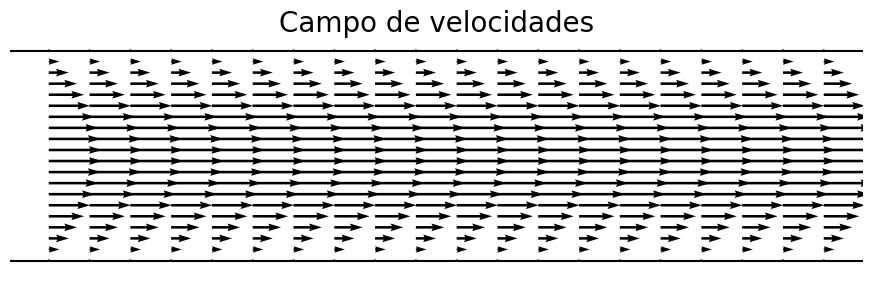

In [ ]:
#Malla rectangular
NG=20
zs=np.linspace(0,L,NG)
xs=np.linspace(-a,a,NG)
ys=np.zeros(NG)

ZS,XS=np.meshgrid(zs,xs)
YS=np.zeros_like(XS)

t=0
VXS=np.zeros_like(XS)
VYS=np.zeros_like(XS)
VZS=np.zeros_like(XS)
for i in range(NG):
  for j in range(NG):
    if XS[i,j]>=-a and XS[i,j]<=a:
      VXS[i,j],VYS[i,j],VZS[i,j]=vfield_tuberia(XS[i,j],YS[i,j],ZS[i,j],
                                                t,vpars)

plt.figure(figsize=(11,3))
plt.title("Campo de velocidades", fontsize= 20)
plt.quiver(ZS,XS,VZS,VXS,scale=40)
plt.axhline(-a,color="black")
plt.axhline(a,color="black")
plt.axis("off")

Para calcular la tasa de descarga volumétrica, es decir, la cantidad de volumen que pasa por la tuberia en unidad de tiempo, se deben tener presentes $\triangle V$ correspondiente al volumen descargado en el tiempo $T$:

$$Q=\frac{\triangle V}{T}$$

Analíticamente, la tasa de descarga se puede halla resolviendo una integral sobre la sección transversal:

\begin{align}
Q&=\int_A \vec{v}\cdot d\vec{S}\\
&=\frac{G}{2\eta}\pi \int_{0}^{a} (a^2-r^2)rdr
\end{align}

Finalmente:

$$\boxed{Q = \frac{\pi a^4}{8\eta}G}$$

Adicionalmente, la velocidad promedio de fluido está dada como el caudal que atraviesa el área transversal:

\begin{align}
U&=\frac{Q}{\pi a^2}\\
\end{align}

$$\boxed{U = \frac{Ga^2}{8\eta}}$$

In [ ]:
def Q(G,a,eta):
  return np.pi*a**4*G/(8*eta)

def U(G,a,eta):
  return G*a**2/(8*eta)

In [ ]:
print(f"""
---------------------------------------
Para el problema que se acaba de resolver,
la tasa de descarga es:

          Q={Q(G,a,eta):.2f}[m³/s]

Y la velocidad promedio del fluido es:

          U={U(G,a,eta):.2f}[m/s]""")


---------------------------------------
Para el problema que se acaba de resolver,
la tasa de descarga es:

          Q=3.93[m³/s]

Y la velocidad promedio del fluido es:

          U=1.25[m/s]
